<a href="https://colab.research.google.com/github/Tiklu01/carPricePredictionLinearRegression/blob/main/modifiedCarsPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [329]:
# Load data from CSV file
df = pd.read_csv('used_cars.csv')

df["milage"] = df["milage"].apply(lambda x: int("".join(x.split(" ")[0].split(","))))
df.head()

df["price"] = df["price"].apply(lambda x: int("".join(x.split("$")[1].split(","))))

# Assume the current year is 2024 for age calculation
current_year = 2024

# Rename columns for clarity
df.rename(columns={'milage': 'mileage'}, inplace=True)


# Extract relevant columns
df = df[['model_year', 'mileage', 'price']]

# Calculate age from year
df['age'] = current_year - df['model_year']



# Extract features and target variable
X = df[['age', 'mileage']].values
y = df['price'].values

print(X)
print('\n')
print(y)



[[   11 51000]
 [    3 34742]
 [    2 22372]
 ...
 [    2  2116]
 [    4 33000]
 [    4 43000]]


[10300 38005 54598 ... 90998 62999 40000]


In [330]:
# Split data into training and testing sets
def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [332]:
# Normalize the features using z-normalization
def z_normalize(X):
    '''
    Args:
      X: input features
    Returns:
      X_norm: normalized features
      mean: mean of each feature
      std: standard deviation of each feature
    '''
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std


In [333]:
X_train_norm, train_mean, train_std = z_normalize(X_train)
X_test_norm = (X_test - train_mean) / train_std

In [334]:
# Set hyperparameters
alpha = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations


In [335]:
# Initialize parameters
w = np.zeros(X_train_norm.shape[1])
b = 0


In [336]:
# Cost function
def compute_cost(X, y, w, b):
    """

    Args:
      X: input features
      y: target variable
      w: weights
      b: bias
      m: number of training examples
    Returns:
      cost: cost value
    """
    m = len(y)
    f_wb = np.dot(X, w) + b
    cost = (1/(2*m)) * np.sum((f_wb - y)**2)
    return cost


In [337]:
# Gradient computation
def compute_gradient(X, y, w, b):
    m = len(y)
    f_wb = np.dot(X, w) + b
    dj_dw = (1/m) * np.dot(X.T, (f_wb - y))
    dj_db = (1/m) * np.sum(f_wb - y)
    return dj_dw, dj_db

In [338]:
# Gradient descent function
def gradient_descent(X, y, w, b, alpha, num_iterations):
    '''
    Args:
      X: input features
      y: target variable
      w: weights
      b: bias
      alpha: learning rate
      num_iterations: number of iterations
    Returns:
      w: updated weights
      b: updated bias
    '''
    j_history = []
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(X, y, w, b)
        j_history.append(cost)
    return w, b, j_history


In [339]:
# Train the model using gradient descent
w, b, cost_history = gradient_descent(X_train_norm, y_train, w, b, alpha, num_iterations)


In [340]:
# Make predictions
y_pred_train = np.dot(X_train_norm, w) + b
y_pred_test = np.dot(X_test_norm, w) + b


In [341]:
# Print the results
print(f"Model parameters: w: {w}, b: {b}")
print(f"Cost history: {cost_history[:10]}...")  # Print first 10 cost values


Model parameters: w: [ -6789.25684993 -18387.7034377 ], b: 43119.18018141072
Cost history: [2213058731.4900913, 2186868351.960839, 2161294772.908184, 2136322622.5683923, 2111936934.6634612, 2088123137.1357763, 2064867041.2094798, 2042154830.7687695, 2019973052.0436234, 1998308603.5937696]...


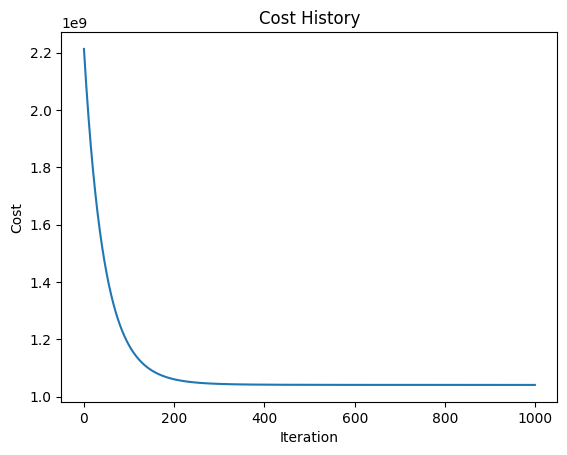

In [342]:
# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()


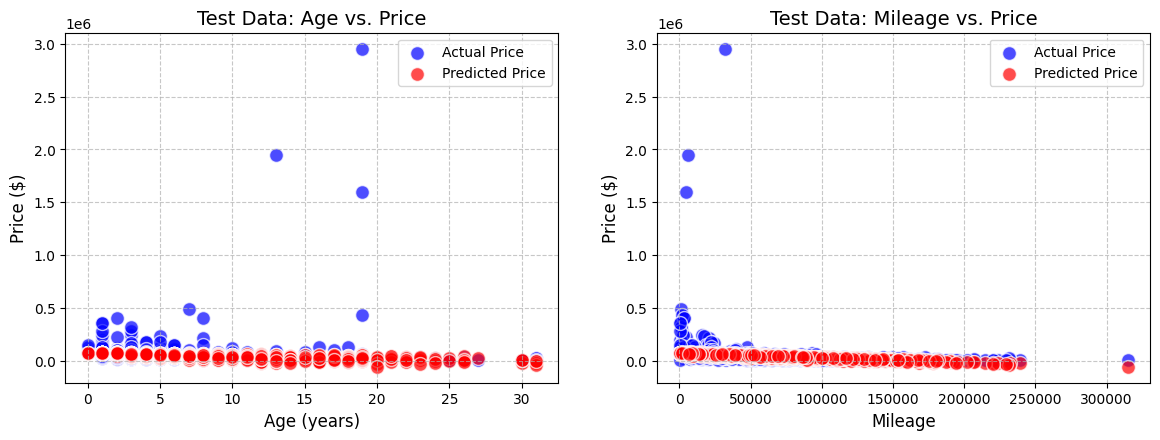

In [343]:
# Set up the plot
plt.figure(figsize=(14, 10))
# Plot 3: Test Data - Age vs. Price
plt.subplot(2, 2, 3)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Price', alpha=0.7, edgecolors='w', s=100)
plt.scatter(X_test[:, 0], y_pred_test, color='red', label='Predicted Price', alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Test Data: Age vs. Price', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot 4: Test Data - Mileage vs. Price
plt.subplot(2, 2, 4)
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual Price', alpha=0.7, edgecolors='w', s=100)
plt.scatter(X_test[:, 1], y_pred_test, color='red', label='Predicted Price', alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Test Data: Mileage vs. Price', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

In [344]:
# Normalize the example data
example_age = 11
example_mileage = 51000
example_age_norm = (example_age - train_mean[0]) / train_std[0]
example_mileage_norm = (example_mileage - train_mean[1]) / train_std[1]

# Make the prediction using normalized values
example_prediction = np.dot(np.array([example_age_norm, example_mileage_norm]), w) + b
print(f"Predicted price for an example with age {example_age} and mileage {example_mileage}: ${example_prediction}")


Predicted price for an example with age 11 and mileage 51000: $45136.9056063577


In [345]:

# Calculate MAE, MSE, RMSE
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

# Training data metrics
train_mae = mae(y_train, y_pred_train)
train_mse = mse(y_train, y_pred_train)
train_rmse = rmse(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Testing data metrics
test_mae = mae(y_test, y_pred_test)
test_mse = mse(y_test, y_pred_test)
test_rmse = rmse(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training Data - MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")
print(f"Test Data - MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")


Training Data - MAE: 22813.27, MSE: 2080982412.48, RMSE: 45617.79, R²: 0.21
Test Data - MAE: 30878.24, MSE: 19880258048.73, RMSE: 140997.37, R²: 0.03
